In [1]:
cd drive/My\ Drive/Colab\ Notebooks/vehicle

/content/drive/My Drive/Colab Notebooks/vehicle


In [2]:
import numpy as np
import cv2
import glob
import tensorflow as tf
from tensorflow.keras import Model, Input, regularizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Add, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import pickle   
import skimage.io as io
from skimage.transform import rotate, AffineTransform, warp
from skimage.util import random_noise
from skimage.filters import gaussian


Using TensorFlow backend.


In [0]:
import pandas as pd

In [4]:
ls

evehicle.h5      submission.csv  vehicle_img2.pickle
images/          test.csv        vehicle_img.pickle
submission2.csv  train.csv       vehicleTest_img.pickle


In [0]:
train = pd.read_csv('train.csv')

In [5]:
train.tail()

,image_names,emergency_or_not
1641,1638.jpg,0
1642,1095.jpg,0
1643,1130.jpg,0
1644,1294.jpg,0
1645,860.jpg,1


In [10]:
train['image_names'][0]

'1503.jpg'

In [0]:
train['image_names'] = [ 'images/' + i for i in train['image_names']]

In [28]:
train['image_names'][0]

'images/1503.jpg'

In [0]:
from tqdm import tqdm         #A progess library

In [30]:
from multiprocessing import Pool
progress = tqdm(total= len(train['image_names']), position=0)
def read(path):
  img = image.load_img(path, target_size=(200,200,3))
  img = image.img_to_array(img)
  img = img/255.
  progress.update(1)
  return img

p = Pool(10)
img_array = p.map(read, train['image_names'])

KeyboardInterrupt: ignored

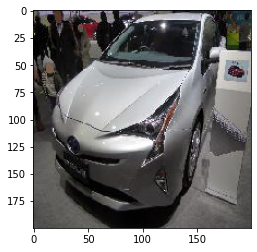

In [0]:
plt.imshow(img_array[0])

In [0]:
with open('vehicle_img.pickle','wb') as f:
  pickle.dump(img_array, f)

In [0]:
with open('vehicle_img.pickle','rb') as f:
  img_array = pickle.load(f)

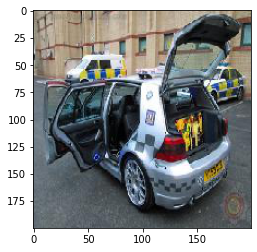

In [7]:
plt.imshow(img_array[1204])

In [9]:
train.head()

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


In [0]:
X=img_array
y=train['emergency_or_not'].values


In [0]:
X=np.array(X)
y=np.array(y)

In [10]:
X.shape, y.shape

((1646, 200, 200, 3), (1646,))

In [11]:
final_train_data = []
final_target_train = []
for i in range(X.shape[0]):
  print(i)
  final_train_data.append(X[i])
  final_train_data.append(rotate(X[i], angle=45, mode = 'wrap'))
  final_train_data.append(np.fliplr(X[i]))
  final_train_data.append(np.flipud(X[i]))
  for j in range(4):
      final_target_train.append(y[i])

1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
1194
1195
1196
1197
1198
1199
1200
1201
1202
1203
1204
1205
1206
1207
1208
1209
1210
1211
1212
1213
1214
1215
1216
1217
1218
1219
1220
1221
1222
1223
1224
1225
1226
1227
1228


In [12]:
len(final_train_data), len(final_target_train)

(6584, 6584)

In [0]:
with open('vehicle_img2.pickle','wb') as f:
  pickle.dump([final_train_data, final_target_train], f)

In [0]:
with open('vehicle_img2.pickle','rb') as f:
  final_train_data, final_target_train = pickle.load(f)

In [0]:
final_train_data = np.array(final_train_data)
final_target_train = np.array(final_target_train)

In [15]:
final_train_data.shape, final_target_train.shape

((6584, 200, 200, 3), (6584,))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [0]:
BATCH_SIZE = 64
IMG_SHAPE = 200 # square image



In [0]:

# #prevent memorization
# train_image_generator = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
#     )

# validation_image_generator = ImageDataGenerator(
#     rescale=1./255)



In [0]:
# train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
#                                                            directory='images',
#                                                            shuffle=True,
#                                                            target_size=(IMG_SHAPE, IMG_SHAPE),
#                                                            class_mode='binary')


Found 0 images belonging to 0 classes.


In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)), # RGB
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5), # 1/2 of neurons will be turned off randomly
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    
    tf.keras.layers.Dense(2, activation='sigmoid') #[0, 1] or [1, 0]
    
    ])

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

EPOCHS = 50

es= EarlyStopping(monitor='val_loss', mode='min', patience=4)
cp= ModelCheckpoint('emergency.h5',save_best_only=True)



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 256)       2

In [21]:

history = model.fit(
    final_train_data,
    final_target_train,
    steps_per_epoch=int(np.ceil(len(X) / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=(X_test, y_test),
    validation_steps=int(np.ceil(len(X_test) / float(BATCH_SIZE)))
    )

Epoch 1/50
26/26 [==============================] - 7s 254ms/step - loss: 0.6703 - accuracy: 0.5990 - val_loss: 0.6417 - val_accuracy: 0.6606
Epoch 2/50
26/26 [==============================] - 5s 205ms/step - loss: 0.6074 - accuracy: 0.6900 - val_loss: 0.5334 - val_accuracy: 0.7515
Epoch 3/50
26/26 [==============================] - 5s 204ms/step - loss: 0.5179 - accuracy: 0.7526 - val_loss: 0.4459 - val_accuracy: 0.7879
Epoch 4/50
26/26 [==============================] - 5s 208ms/step - loss: 0.4445 - accuracy: 0.7927 - val_loss: 0.3930 - val_accuracy: 0.8152
Epoch 5/50
26/26 [==============================] - 5s 197ms/step - loss: 0.4213 - accuracy: 0.8021 - val_loss: 0.3534 - val_accuracy: 0.8212
Epoch 6/50
26/26 [==============================] - 5s 203ms/step - loss: 0.3737 - accuracy: 0.8328 - val_loss: 0.3288 - val_accuracy: 0.8485
Epoch 7/50
26/26 [==============================] - 5s 205ms/step - loss: 0.3380 - accuracy: 0.8472 - val_loss: 0.2726 - val_accuracy: 0.8545
Epoch 

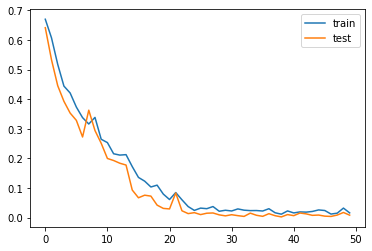

In [22]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend() 
pyplot.show()

In [0]:
#model.save('evehicle.h5')

In [0]:
a = model.predict(X_test)

[2.9219297e-01 1.2238086e-05]


0.29219297

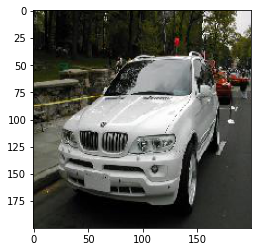

In [24]:
i=20
pyplot.imshow(X_test[i])
print(a[i])
max(a[i])

[2.570103e-13 1.000000e+00]


1.0

In [0]:
test = pd.read_csv('test.csv')

In [26]:
test.tail()

,image_names
701,674.jpg
702,1027.jpg
703,447.jpg
704,2176.jpg
705,1014.jpg


In [0]:
test['image_names'] = [ 'images/' + i for i in test['image_names']]

In [0]:
from tqdm import tqdm         #A progess library

In [29]:
from multiprocessing import Pool
progress = tqdm(total= len(test['image_names']), position=0)
def read(path):
  img = image.load_img(path, target_size=(200,200,3))
  img = image.img_to_array(img)
  img = img/255.
  progress.update(1)
  return img

p = Pool(10)
img_array = p.map(read, test['image_names'])

 10%|█         | 72/706 [03:51<12:29,  1.18s/it]

In [0]:
img_array = np.array(img_array)

In [0]:
with open('vehicleTest_img.pickle','wb') as f:
  pickle.dump(img_array, f)

In [0]:
a = model.predict(img_array)

[6.2256920e-01 2.9264978e-08]
0.6225692
0


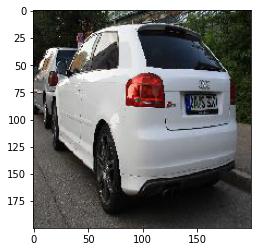

In [40]:
i=452
pyplot.imshow(img_array[i])
print(a[i])
print(max(a[i]))

print(a[i].argmax())

In [0]:
emergency_or_not=[]

In [0]:
for i in range(len(img_array)):
  emergency_or_not.append(a[i].argmax())

In [35]:
emergency_or_not[452]

0

In [0]:
submission = pd.DataFrame()

In [0]:
test = pd.read_csv('test.csv')

In [0]:
submission['image_names']=test['image_names']
submission['emergency_or_not']=emergency_or_not

In [0]:
submission.to_csv('submission2.csv', index=False)

In [0]:
s = pd.read_csv('submission.csv')

In [42]:
s.head(50)

,image_names,emergency_or_not
0,1960.jpg,0
1,668.jpg,1
2,2082.jpg,0
3,808.jpg,1
4,1907.jpg,0
5,350.jpg,1
6,1557.jpg,0
7,111.jpg,1
8,1952.jpg,1
9,1466.jpg,0
